In [48]:
!pip install pyreadstat
!pip install pgmpy


In [49]:
!wget https://www.samhsa.gov/data/system/files/media-puf-file/NSDUH-2023-DS0001-bndl-data-tsv_v1.zip

--2025-02-17 06:27:12--  https://www.samhsa.gov/data/system/files/media-puf-file/NSDUH-2023-DS0001-bndl-data-tsv_v1.zip
Resolving www.samhsa.gov (www.samhsa.gov)... 158.71.215.157, 158.71.215.158
Connecting to www.samhsa.gov (www.samhsa.gov)|158.71.215.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29033143 (28M) [application/zip]
Saving to: ‘NSDUH-2023-DS0001-bndl-data-tsv_v1.zip.1’

NSDUH-2023-DS0001-b 100%[===================>]  27.69M  26.1MB/s    in 1.1s    

2025-02-17 06:27:14 (26.1 MB/s) - ‘NSDUH-2023-DS0001-bndl-data-tsv_v1.zip.1’ saved [29033143/29033143]



In [50]:
!unzip -j NSDUH-2023-DS0001-bndl-data-tsv_v1.zip "*.txt" -d .

Archive:  NSDUH-2023-DS0001-bndl-data-tsv_v1.zip
replace ./NSDUH_2023_Tab.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [51]:
import pandas as pd

df = pd.read_csv('NSDUH_2023_Tab.txt', sep='\t', header=0)

<ipython-input-51-7832392947ee>:3: DtypeWarning: Columns (2635) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NSDUH_2023_Tab.txt', sep='\t', header=0)


In [52]:
# df.describe()

In [57]:
# Pick columns
desired_columns = [
    "AGE3",       # Age category
    "SERVICE",    # U.S. Army?
    "IRSEX",      # Respondent sex
    "IRMARIT",    # Marital status
    "NEWRACE2",   # Race
    "IREDUHIGHST2", # Education level (1-11)
    "BOOKED",     # Ever arrested? (1=Yes,2=No)
    "CIG30USE",   # Cigarette use in past 30 days
    "NICVAPEVER", # Ever vaped nicotine
    "CADRLAST",   # # of drinks in past 30 days
    "ALCDAYS",    # # of days w/ alc past 30 days
    "MJEVER",     # Ever used marijuana
    "MJAGE",      # Age first used MJ
    "MJYRTOT",    # # of years used MJ
    "MJDAY30A",   # # of days used MJ in past 30
    "COCEVER",    # Ever used cocaine
    "HEREVER",    # Ever used heroin
    "LSD",        # Ever used LSD
    "PSILCY",     # Ever used psilocybin
    "ECSTMOLLY",  # Ecstasy/Molly
    "METHAMEVR",  # Ever used meth
    "METHAMYFQ",  # Frequency of meth use
    "TRBZOANYYR", # Benzo use in last year
    "IRALCBNG30D", # Binge drinking
    "MICATPY", # Past year mental illness, (0=No, 1=Mild, 2=Moderate, 3=Severe)
    "AMDELT", #MDE
    "IRAMDELT", #lifetime MDE
    "CONEGMH", # COVID and mental health
]

In [58]:
irpyud5_columns = [col for col in df.columns if col.startswith("IRPYUD5")]
desired_columns.extend(irpyud5_columns)

In [55]:
#df_filtered[irpyud5_columns]

In [59]:
import numpy as np
df_filtered = df[desired_columns].copy()


substance_code_mapping = {91: 0, 991: 0, 93: 0, 993: 0, 94: np.nan, 97: np.nan}
substance_columns = [
    "CIG30USE","MJEVER", "COCEVER", "HEREVER", "LSD", "PSILCY", "ECSTMOLLY", "METHAMEVR",
    "IRALCBNG30D", "METHAMYFQ", "TRBZOANYYR", "NICVAPEVER", "CADRLAST", "MJDAY30A", "ALCDAYS"
    ]
for col in substance_columns: df_filtered[col] = df_filtered[col].replace(substance_code_mapping)
missing_codes = [81, 981, 85, 985, 94, 994, 95, 995, 97, 997, 98, 998, 99, 999]  # Example set; confirm in codebook
for col in df_filtered.columns:
    df_filtered[col] = df_filtered[col].replace(missing_codes, np.nan)


df_filtered["IRSEX"] = df_filtered["IRSEX"].map({1: "Male", 2: "Female"})
df_filtered["BOOKED"] = df_filtered["BOOKED"].map({1: "Yes", 2: "No"})
df_filtered["IREDUHIGHST2"] = df_filtered["IREDUHIGHST2"].map({1: "Less than HS",
                                                               2: "Less than HS",
                                                               3: "Less than HS",
                                                               4: "Less than HS",
                                                               5: "Less than HS",
                                                               6: "Less than HS",
                                                               7: "Less than HS",
                                                               8: "HS",
                                                               9: "Some college credit",
                                                               10: "Associates",
                                                               11: "Bachelors or higher"})

df_filtered["SERVICE"] = df_filtered["SERVICE"].map({1: "Yes", 2: "No"})
df_filtered['AGE3'] = df_filtered['AGE3'].map({
    1: "12-13",
    2: "14-15",
    3: "16-17",
    4: "18-20",
    5: "21-23",
    6: "24-25",
    7: "26-29",
    8: "30-34",
    9: "35-49",
    10: "50-64",
    11: "65-"
})
df_filtered["IRMARIT"] = df_filtered["IRMARIT"].map({
    1: "Married",
    2: "Widowed",
    3: "Divorced or separated",
    4: "Never married"})
df_filtered["NEWRACE2"] = df_filtered["NEWRACE2"].map({
   1: "White",
   2: "Black",
   3: "Native",
   4: "Pacific Islander",
   5: "Asian",
   6: "More than one race",
   7: "Hispanic"
})

In [60]:
df_filtered.describe()

,CIG30USE,NICVAPEVER,CADRLAST,ALCDAYS,MJEVER,MJAGE,MJYRTOT,MJDAY30A,COCEVER,HEREVER,LSD,PSILCY,ECSTMOLLY,METHAMEVR,METHAMYFQ,TRBZOANYYR,IRALCBNG30D,MICATPY,AMDELT,IRAMDELT,CONEGMH,IRPYUD5ALC,IRPYUD5MRJ,IRPYUD5COC,IRPYUD5HER,IRPYUD5HAL,IRPYUD5INH,IRPYUD5MTH
count,56654.000000,56686.000000,55341.000000,55834.000000,56651.000000,56491.000000,56293.000000,56346.000000,56676.000000,56645.000000,56662.000000,56613.000000,56650.000000,56628.000000,56604.000000,56513.000000,56705.000000,45133.000000,43795.000000,45133.000000,54729.000000,56705.000000,56705.000000,56705.000000,56705.000000,56705.000000,56705.000000,56705.000000
mean,2.380114,1.691000,1.179867,3.270695,1.549929,554.669009,781.566536,2.772051,1.885419,1.981128,0.231231,0.214421,0.242630,1.955711,1.313794,0.070904,0.925721,0.512751,1.799589,0.200718,2.021195,0.109197,0.089780,0.004797,0.002081,0.002539,0.001411,0.005696
std,7.678452,0.462085,2.460514,6.320605,0.497505,483.856606,372.480352,7.802705,0.318519,0.136074,0.564544,0.528295,0.589679,0.205738,18.619335,0.256667,3.147238,0.932941,0.400312,0.400542,1.159412,0.311889,0.285869,0.069093,0.045570,0.050329,0.037535,0.075258
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,991.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,2.000000,991.000000,991.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,2.000000,3.000000,2.000000,991.000000,991.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,2.000000,90.000000,30.000000,2.000000,991.000000,993.000000,30.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,365.000000,1.000000,30.000000,3.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel, BayesianNetwork
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split

# Categorize using bins
df_bn = df_filtered.copy()

df_bn['CADRLAST'] = pd.to_numeric(df_bn['CADRLAST'], errors='coerce')
df_bn['CADRLAST_cat'] = pd.cut(df_bn['CADRLAST'], bins=[-1, 0, 5, 15, np.inf], labels=["None", "Low", "Medium", "High"])
df_bn['ALCDAYS'] = pd.to_numeric(df_bn['ALCDAYS'], errors='coerce')
df_bn['ALCDAYS_cat'] = pd.cut(df_bn['ALCDAYS'], bins=[-1, 0, 4, 10, 20, np.inf], labels=["None", "Low", "Medium", "High", "Very High"])
df_bn['MJDAY30A'] = pd.to_numeric(df_bn['MJDAY30A'], errors='coerce')
df_bn['MJDAY30A_cat'] = pd.cut(df_bn['MJDAY30A'], bins=[-1, 0, 4, 10, 20, np.inf], labels=["None", "Low", "Medium", "High", "Very High"])

df_bn['CIG30USE'] = pd.to_numeric(df_bn['CIG30USE'], errors='coerce')
df_bn['CIG30USE_cat'] = pd.cut(df_bn['CIG30USE'], bins=[-1, 0, 4, 10, 20, np.inf], labels=["None", "Low", "Medium", "High", "Very High"])

#variables_bn = ['AGE3', 'IRSEX', 'NEWRACE2', 'IREDUHIGHST2', 'CADRLAST_cat', 'MJEVER', 'AMDELT',"NICVAPEVER", "CADRLAST", "MJDAY30A_cat","METHAMEVR", "MICATPY"]
variables_bn = ['AGE3', 'IRSEX', 'NEWRACE2', 'IREDUHIGHST2', 'CADRLAST_cat', 'AMDELT',"NICVAPEVER", "CADRLAST", "MJDAY30A_cat", "MICATPY", "ALCDAYS_cat", "CIG30USE_cat"]
sud_variables_bn = df_bn[irpyud5_columns].dropna().copy()
variables_bn.extend(sud_variables_bn)
bn_data = df_bn[variables_bn].dropna().copy()

for col in bn_data.columns:
    bn_data[col] = bn_data[col].astype(str)


train_data, test_data = train_test_split(bn_data, test_size=0.15, random_state=42)
hc = HillClimbSearch(train_data)
learned_dag = hc.estimate(scoring_method=BicScore(train_data))
print("Learned DAG edges:")
print(learned_dag.edges())


G = BayesianNetwork(learned_dag.edges())

G.fit(train_data, estimator=MaximumLikelihoodEstimator)



  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned DAG edges:
[('AGE3', 'IREDUHIGHST2'), ('AGE3', 'NICVAPEVER'), ('AGE3', 'CIG30USE_cat'), ('IRSEX', 'MICATPY'), ('IREDUHIGHST2', 'NEWRACE2'), ('IREDUHIGHST2', 'ALCDAYS_cat'), ('IREDUHIGHST2', 'CIG30USE_cat'), ('IREDUHIGHST2', 'IRSEX'), ('IREDUHIGHST2', 'AMDELT'), ('CADRLAST_cat', 'CADRLAST'), ('AMDELT', 'NEWRACE2'), ('NICVAPEVER', 'IRPYUD5MRJ'), ('NICVAPEVER', 'ALCDAYS_cat'), ('NICVAPEVER', 'MJDAY30A_cat'), ('NICVAPEVER', 'MICATPY'), ('NICVAPEVER', 'IRPYUD5ALC'), ('NICVAPEVER', 'IRPYUD5MTH'), ('MICATPY', 'AMDELT'), ('MICATPY', 'IRPYUD5MRJ'), ('ALCDAYS_cat', 'CADRLAST_cat'), ('ALCDAYS_cat', 'IRPYUD5ALC'), ('ALCDAYS_cat', 'MJDAY30A_cat'), ('ALCDAYS_cat', 'IRSEX'), ('CIG30USE_cat', 'NICVAPEVER'), ('CIG30USE_cat', 'IRPYUD5MTH'), ('CIG30USE_cat', 'IRPYUD5COC'), ('IRPYUD5ALC', 'CADRLAST_cat'), ('IRPYUD5ALC', 'MICATPY'), ('IRPYUD5ALC', 'IRPYUD5COC'), ('IRPYUD5ALC', 'IRPYUD5MRJ'), ('IRPYUD5MRJ', 'MJDAY30A_cat'), ('IRPYUD5MRJ', 'IRPYUD5HAL'), ('IRPYUD5MRJ', 'IRPYUD5INH'), ('IRPYUD5COC', '

In [62]:

bic = BicScore(test_data)
test_bic_score = bic.score(G)
print("Test Data BIC Score:", test_bic_score)

inference = VariableElimination(G)

query_result = inference.query(variables=['AMDELT'], evidence={'IRSEX': 'Male', 'CADRLAST_cat': 'High'})
print("\nProbability distribution for depression (AMDELT) given Male and High alcohol consumption:")
print(query_result)

Test Data BIC Score: -72598.59563411324

Probability distribution for depression (AMDELT) given Male and High alcohol consumption:
+-------------+---------------+
| AMDELT      |   phi(AMDELT) |
+=============+===============+
| AMDELT(1.0) |        0.2191 |
+-------------+---------------+
| AMDELT(2.0) |        0.7809 |
+-------------+---------------+


In [71]:

# Given the sample is a male, has used medium quantities of marijuana in the last month, and drinks less than once a week, what are their mental illness severity?
smi_query = inference.query(variables=['MICATPY'], evidence={'IRSEX': 'Male', 'MJDAY30A_cat': 'Medium', 'ALCDAYS_cat': 'Low'})
print(smi_query)


+--------------+----------------+
| MICATPY      |   phi(MICATPY) |
+==============+================+
| MICATPY(0.0) |         0.7085 |
+--------------+----------------+
| MICATPY(1.0) |         0.1284 |
+--------------+----------------+
| MICATPY(2.0) |         0.0761 |
+--------------+----------------+
| MICATPY(3.0) |         0.0870 |
+--------------+----------------+


In [ ]:
bn_data['METHAMEVR'][0]

In [77]:

inference = VariableElimination(G)


categories = ["None", "Low", "High", "Very High"]
gender = ['Male', 'Female']
alc_days = ["None", "Low", "High", "Very High"]
results = {}
for gen in gender:
    for alc in alc_days:
        for cat in categories:
            query_result = inference.query(
                variables=['MICATPY'],
                evidence={'IRSEX': gen, 'MJDAY30A_cat': cat, 'ALCDAYS_cat': alc}
            )
            key = (gen, alc, cat)
            results[key] = pd.Series(query_result.values, index=query_result.state_names['MICATPY'])

# Combine the Series into a DataFrame.
results_df = pd.DataFrame(results).T
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['IRSEX', 'MJDAY30A_cat', 'ALCDAYS_cat'])

print(results_df)


                                      0.0       1.0       2.0       3.0
IRSEX  MJDAY30A_cat ALCDAYS_cat                                        
Male   None         None         0.823661  0.092102  0.046194  0.038043
                    Low          0.754999  0.115553  0.064512  0.064936
                    High         0.681244  0.136365  0.084069  0.098322
                    Very High    0.649834  0.145452  0.092573  0.112141
       Low          None         0.804567  0.099830  0.050948  0.044655
                    Low          0.749311  0.117857  0.065404  0.067428
                    High         0.676415  0.137282  0.084575  0.101727
                    Very High    0.626328  0.150334  0.097653  0.125686
       High         None         0.775924  0.111043  0.057444  0.055588
                    Low          0.734458  0.124136  0.068143  0.073263
                    High         0.663995  0.141410  0.086274  0.108321
                    Very High    0.580974  0.155452  0.108267  0

In [83]:

gender = ['Male', 'Female']
alc_days = ["None", "Low", "Medium", "Very High"]
results = {}
for gen in gender:
    for alc in alc_days:
        for cat in categories:
            query_result = inference.query(
                variables=['MICATPY'],
                evidence={'IRSEX': gen, 'MJDAY30A_cat': cat, 'ALCDAYS_cat': alc}
            )
            key = (gen, alc, cat)
            results[key] = pd.Series(query_result.values, index=query_result.state_names['MICATPY'])

# Combine the Series into a DataFrame.
results_df = pd.DataFrame(results).T
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['IRSEX', 'ALCDAYS', 'MJDAY30'])

print(results_df)

                                 0.0       1.0       2.0       3.0
IRSEX  ALCDAYS   MJDAY30                                          
Male   None      None       0.823661  0.092102  0.046194  0.038043
                 Low        0.754999  0.115553  0.064512  0.064936
                 High       0.681244  0.136365  0.084069  0.098322
                 Very High  0.649834  0.145452  0.092573  0.112141
       Low       None       0.804567  0.099830  0.050948  0.044655
                 Low        0.749311  0.117857  0.065404  0.067428
                 High       0.676415  0.137282  0.084575  0.101727
                 Very High  0.626328  0.150334  0.097653  0.125686
       Medium    None       0.789586  0.105648  0.054417  0.050349
                 Low        0.749385  0.118842  0.064851  0.066922
                 High       0.664334  0.139654  0.087034  0.108978
                 Very High  0.590776  0.155653  0.106287  0.147284
       Very High None       0.768547  0.114837  0.058767  0.05

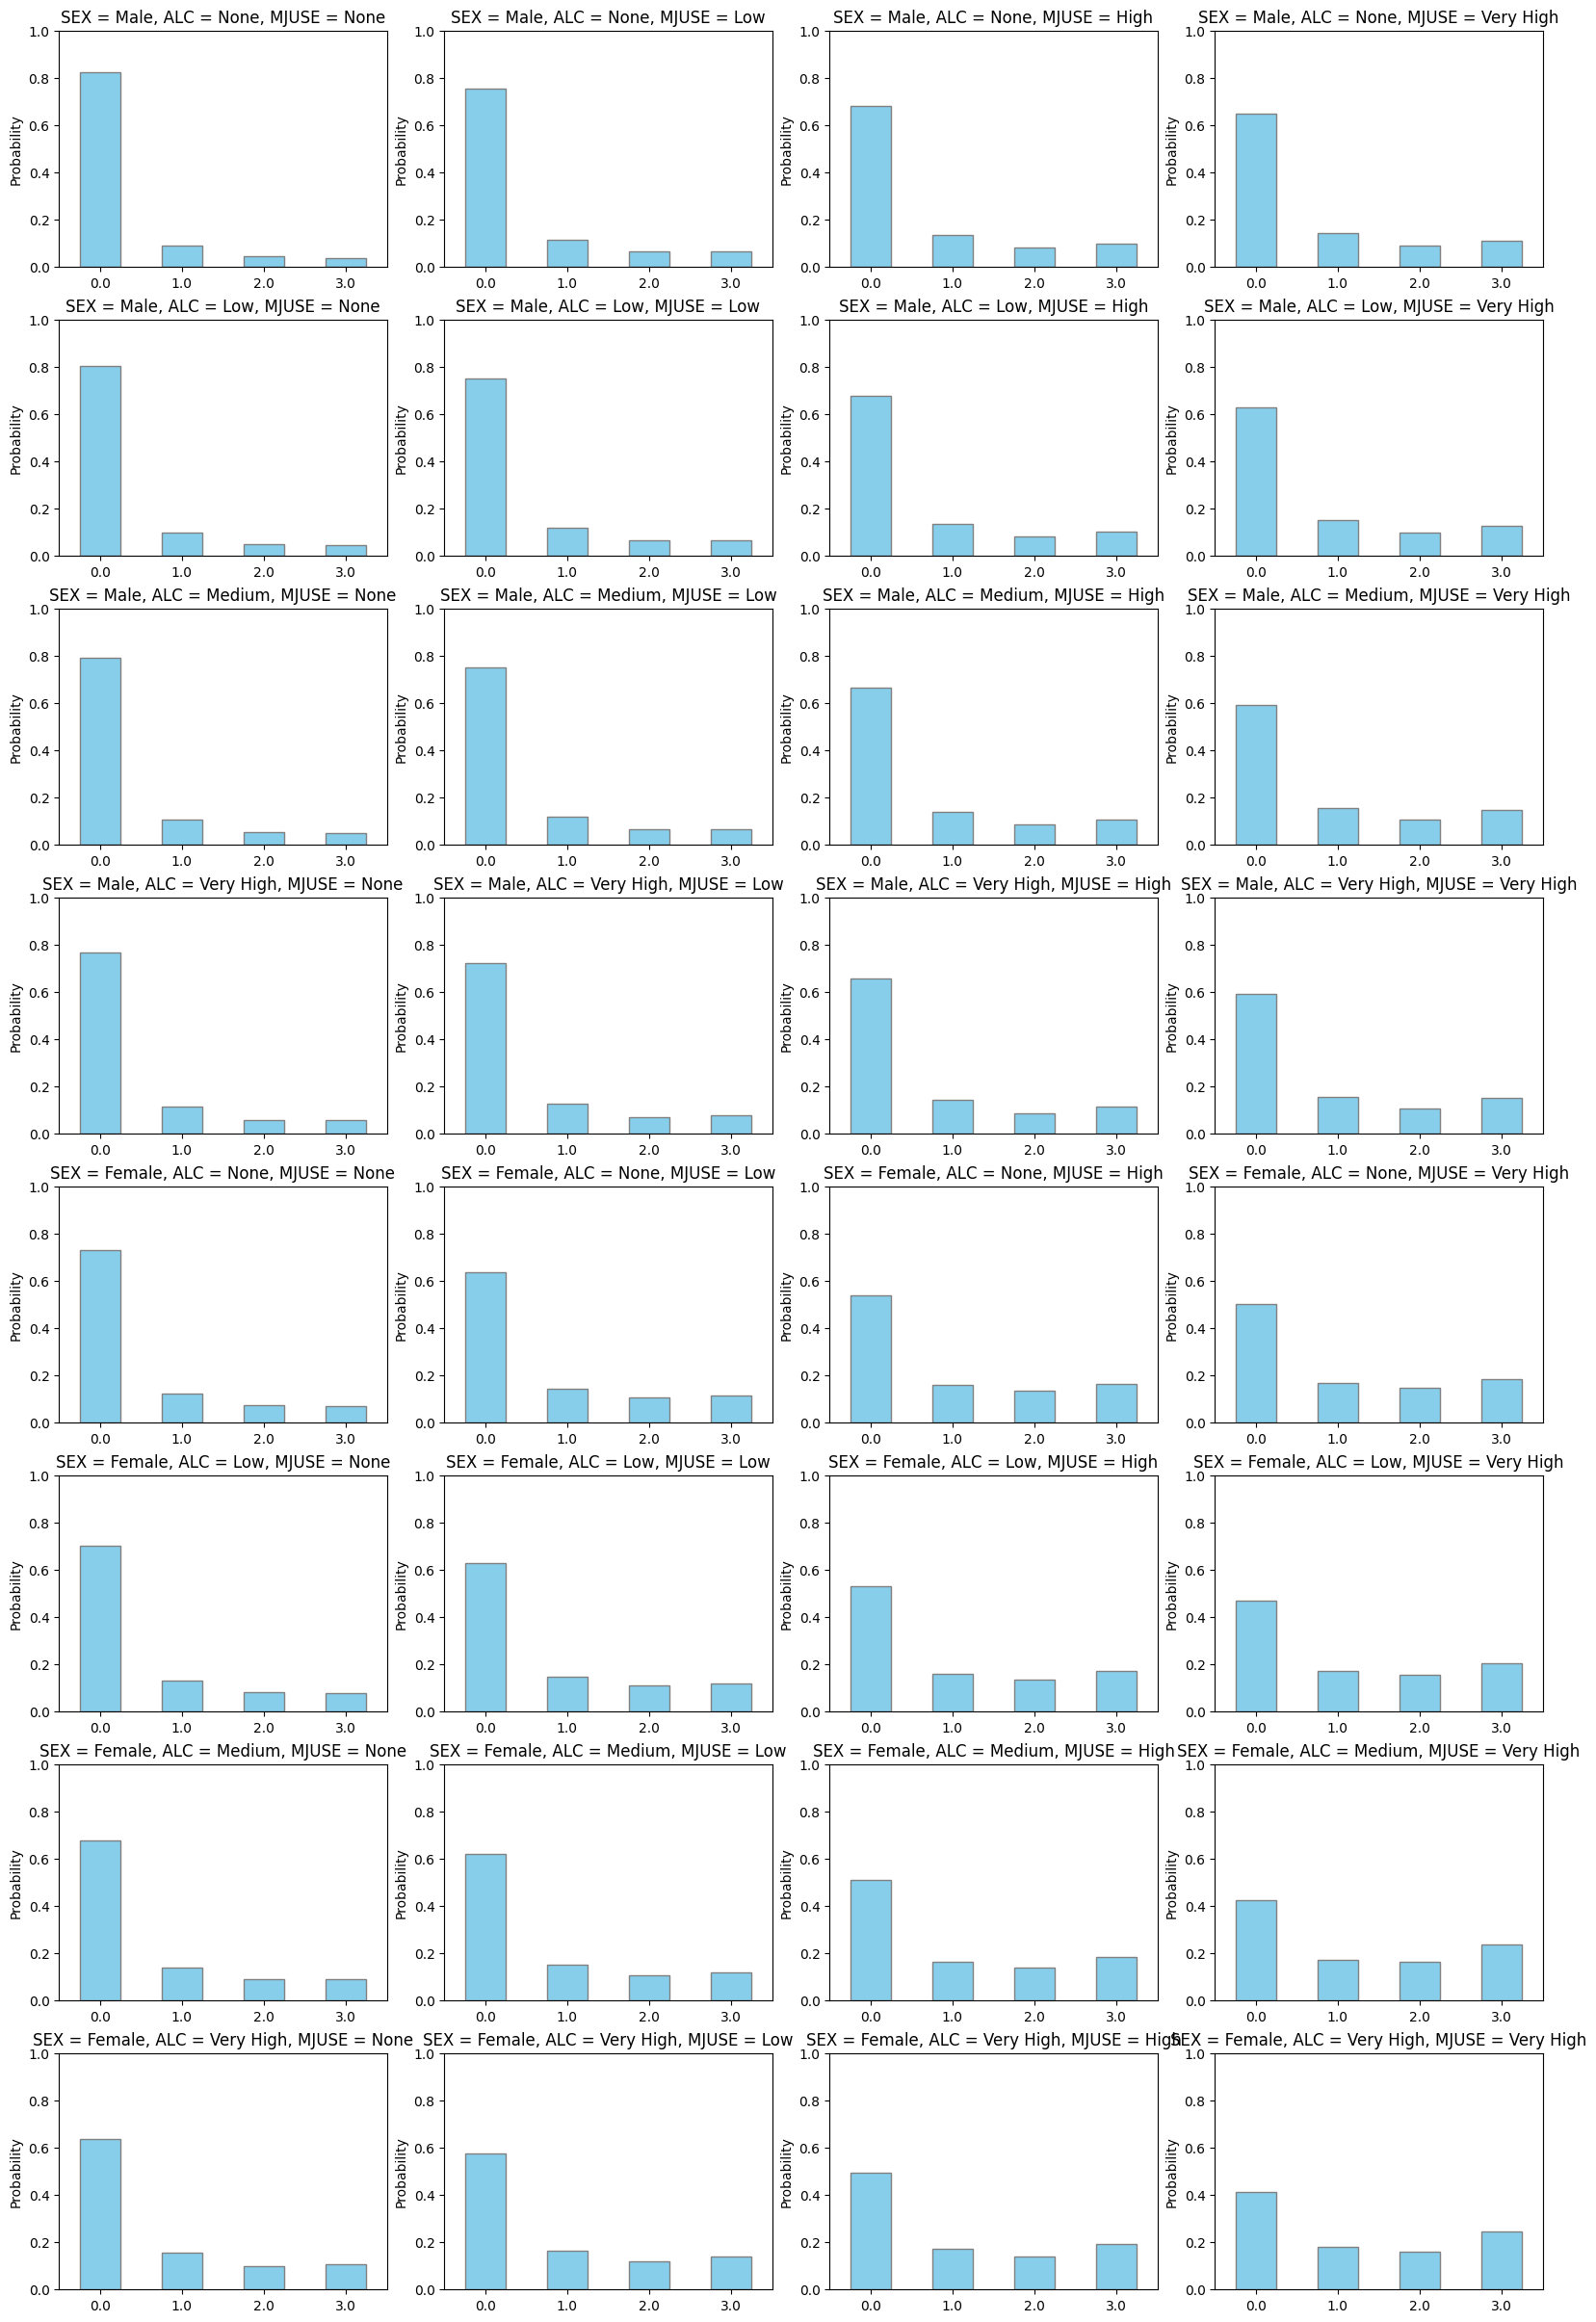

In [84]:
import matplotlib.pyplot as plt
n_plots = len(results)
fig, axes = plt.subplots(8, 4, figsize=(16, 24), layout='constrained')


axes = axes.flatten()
for ax, ((gen, alc, cat), prob_series) in zip(axes, results.items()):
    # Plot a bar chart with light colors and edges.
    prob_series.plot(kind='bar', ax=ax, color='skyblue', edgecolor='gray', linewidth=1)
    ax.set_title(f'SEX = {gen}, ALC = {alc}, MJUSE = {cat}')
    ax.set_ylabel('Probability')
    ax.set_ylim(0, 1)

    ax.tick_params(axis='x', rotation=0)

plt.show()


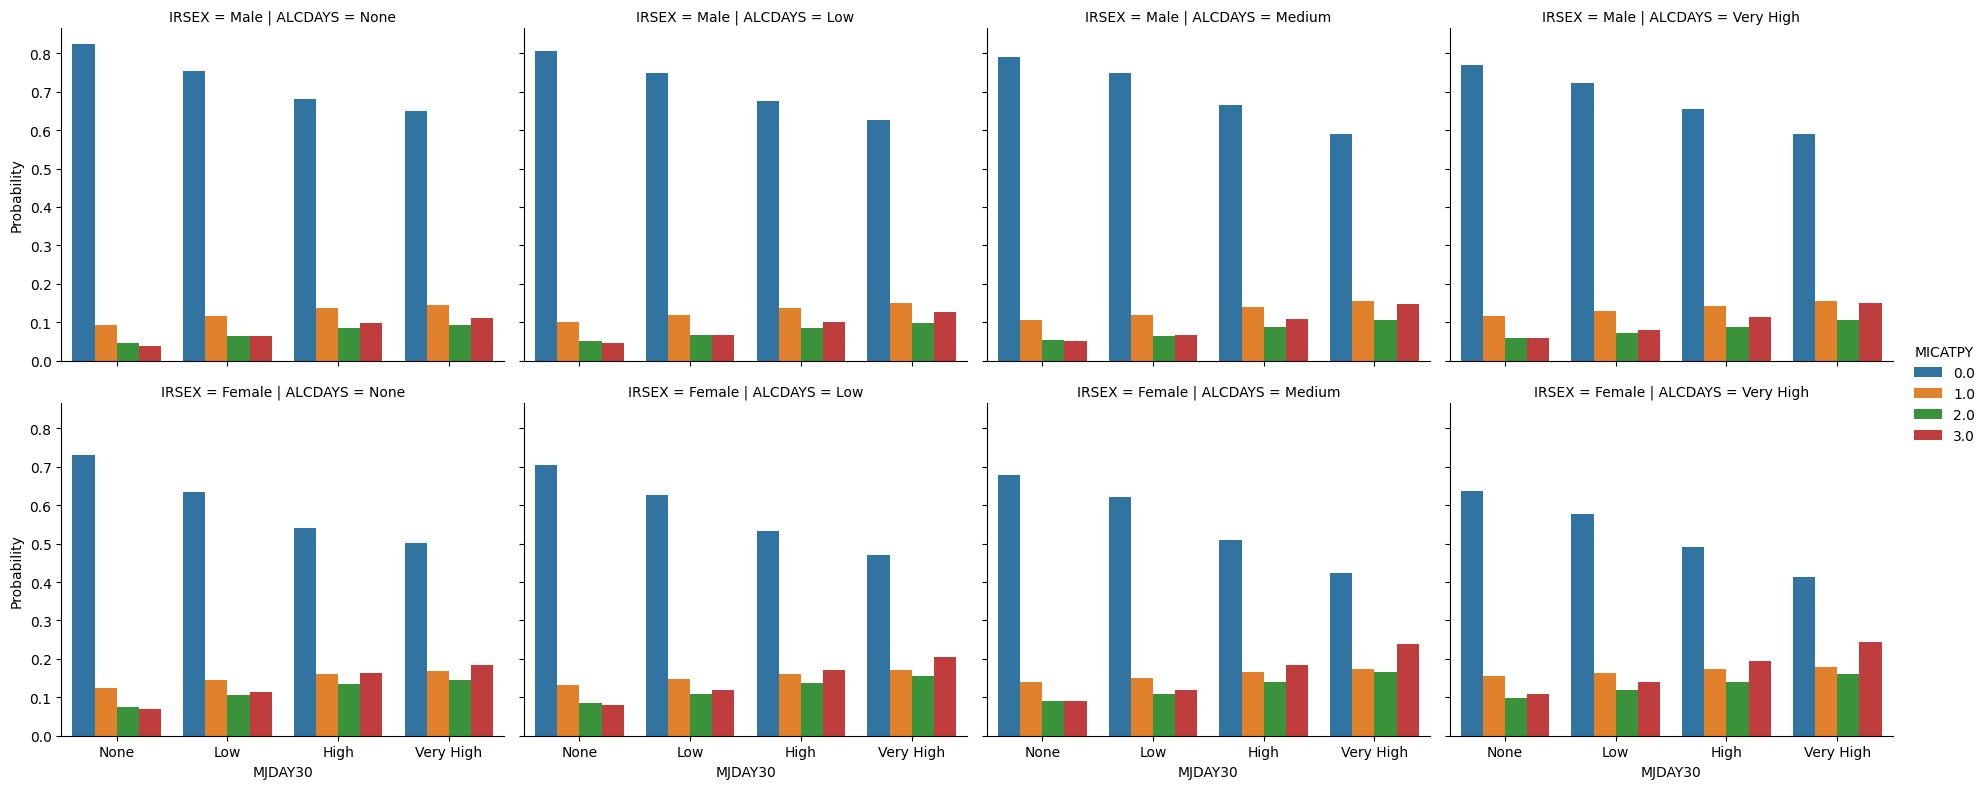

In [85]:
import seaborn as sns

df_long = results_df.reset_index().melt(id_vars=['IRSEX', 'ALCDAYS', 'MJDAY30'],
                                         var_name='MICATPY', value_name='Probability')

sns.catplot(data=df_long, x='MJDAY30', y='Probability', hue='MICATPY',
            col='ALCDAYS', row='IRSEX', kind='bar', height=4, aspect=1.2)
plt.show()

In [ ]:
df_filtered["NEWRACE2"].value_counts()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_filtered["NEWRACE2"], df_filtered["MJEVER"])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("Chi-square test: chi2 =", chi2, "p-value =", p)

In [ ]:
df_filtered.to_csv('nsduh_2023_filtered.csv', index=False)

In [ ]:
with open('nsduh_2023.tsv') as f:
    print(f)